#1. Fraud Data

###Import libraries

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.

In [ ]:
#Load dataset
fraud = pd.read_csv("https://raw.githubusercontent.com/omgo101/dataset-/main/Fraud_check%20(2).csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


###EDA

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable

fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [ ]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [ ]:
#Lets assume: taxable_income<=30000 as 'risky=0' and not risky as 'good=1'
#After creating new col., TaxInc also made its dummies var concating right side of df
fraud = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)

In [ ]:
fraud.head(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
5,33329,116382,0,0,0,0,0,1
6,83357,80890,8,0,0,0,1,1
7,62774,131253,3,1,0,1,1,1
8,83519,102481,12,0,0,1,1,1
9,98152,155482,4,1,0,0,1,1


###Visualization

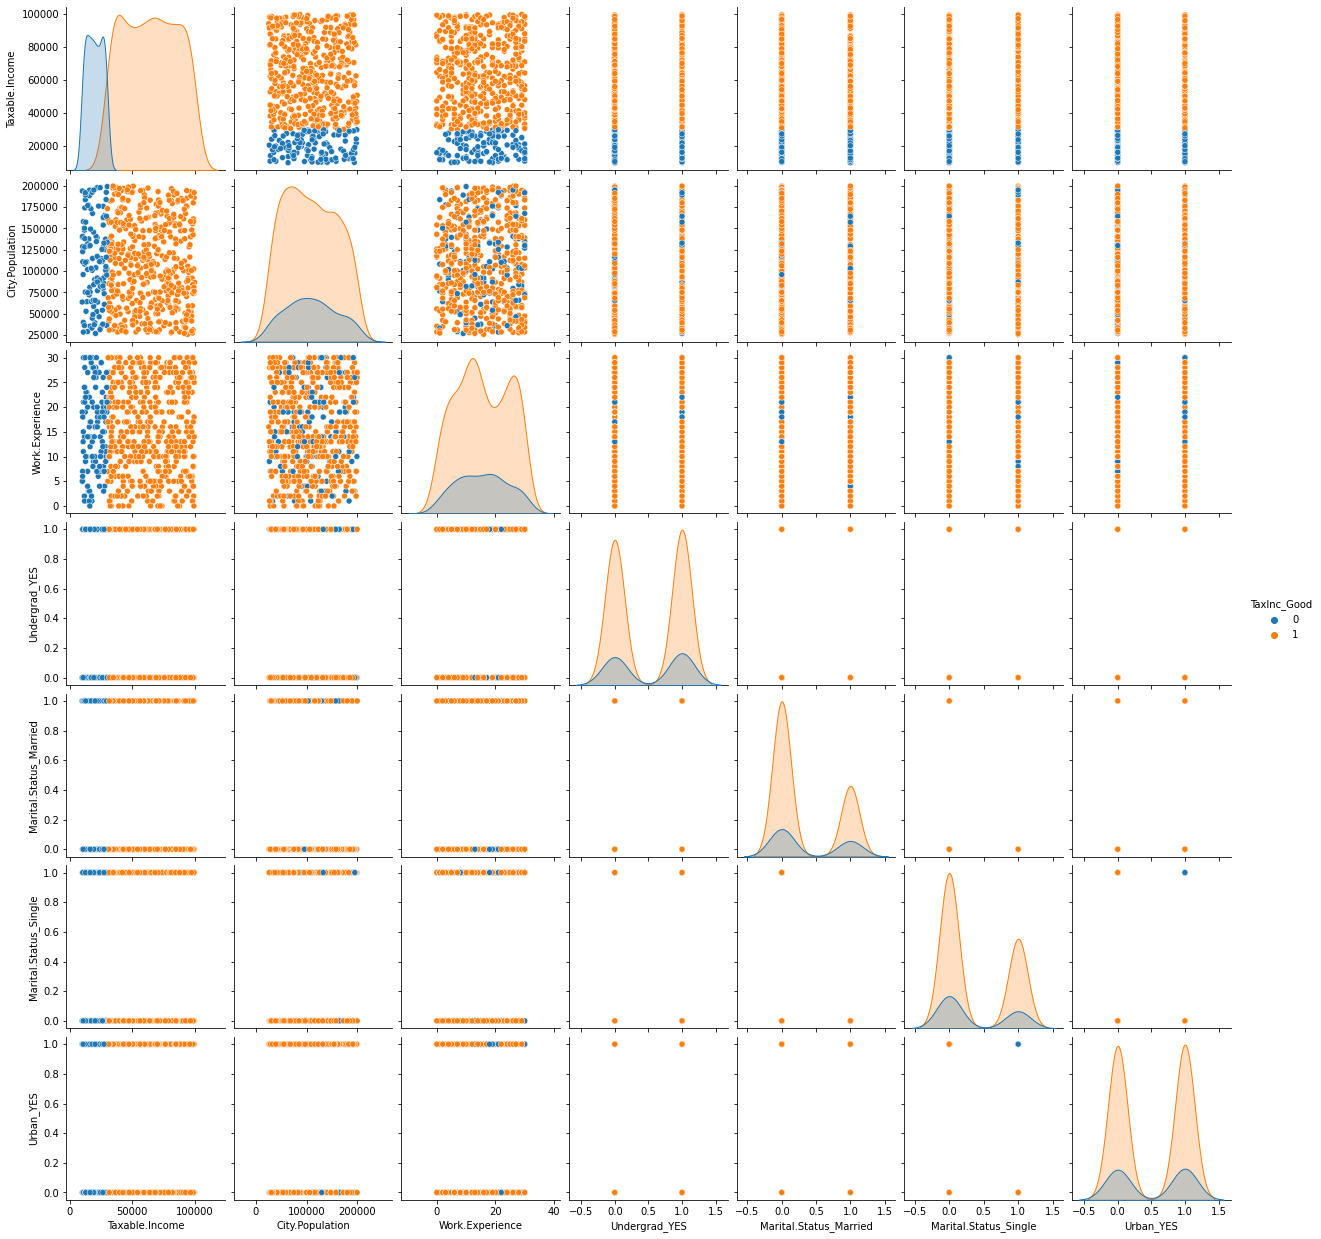

In [ ]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=fraud, hue = 'TaxInc_Good')

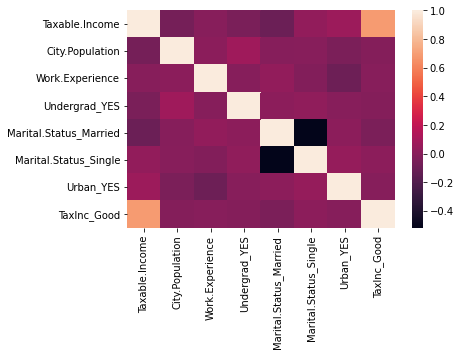

In [ ]:
# correlation matrix
sns.heatmap(fraud.corr())

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
fraud_norm=norm_func(fraud.iloc[:,1:])
fraud_norm.head(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
5,0.520710,0.000000,0.0,0.0,0.0,0.0,1.0
6,0.316732,0.266667,0.0,0.0,0.0,1.0,1.0
7,0.606176,0.100000,1.0,0.0,1.0,1.0,1.0
8,0.440819,0.400000,0.0,0.0,1.0,1.0,1.0
9,0.745424,0.133333,1.0,0.0,0.0,1.0,1.0


In [ ]:
# Declaring features & target
X = fraud_norm.drop(['TaxInc_Good'], axis=1)
y = fraud_norm['TaxInc_Good']

In [ ]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
##Converting the Taxable income variable to bucketing. 
fraud_norm["income"]="<=30000"
fraud_norm.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud_norm.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [ ]:
##Droping the Taxable income variable
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [ ]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [ ]:
##Splitting the data into featuers and labels
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [ ]:
## Collecting the column names
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

##Building Decision Tree Classifier(C5.0) using Entropy Criteria 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

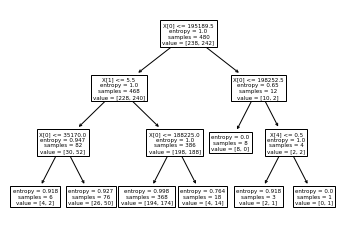

In [ ]:
from sklearn import tree
#PLot the decision tree
tree.plot_tree(model);

In [ ]:
colnames = list(fraud.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

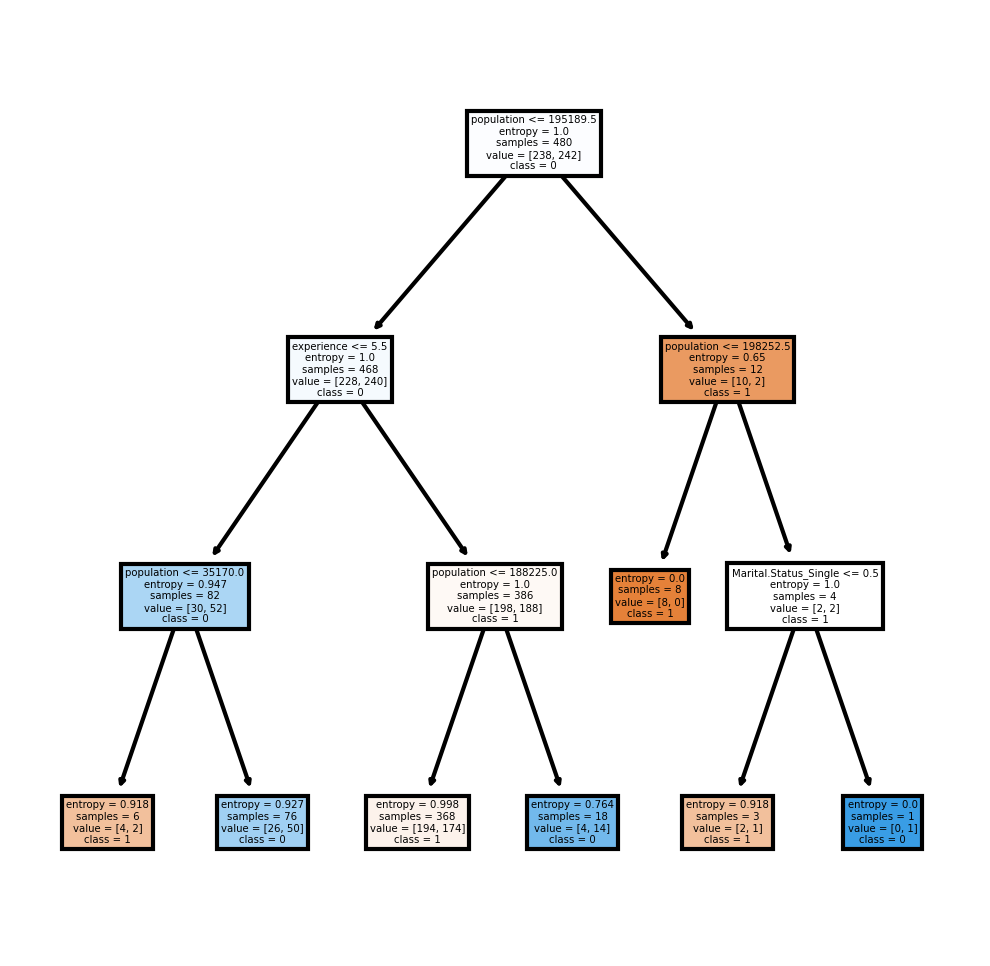

In [ ]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    103
1     17
dtype: int64

In [ ]:
preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban_YES,,
0,52,8
1,51,9


In [ ]:
# Accuracy 
np.mean(preds==y_test)

0.5083333333333333

##Building Decision Tree(CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5083333333333333

##Decision Tree Regression

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = fraud.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(X_test,y_test)

-0.8470149253731345

#2. Company Data

In [ ]:
#reading the data
company = pd.read_csv('https://raw.githubusercontent.com/omgo101/dataset-/main/Company_Data%20(1).csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


###EDA

In [ ]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
company.shape

(400, 11)

In [ ]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [ ]:
company['ShelveLoc']=company['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
company["Urban"]=le.fit_transform(company["Urban"])
company["US"]=le.fit_transform(company["US"])

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
company=company.assign(Sale=pd.cut(company['Sales'], 
                               bins=[ 0, 4, 9,15], 
                               labels=['Low', 'Medium', 'High']))

In [ ]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,3,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,3,38,13,1,0,Medium


###Visualization

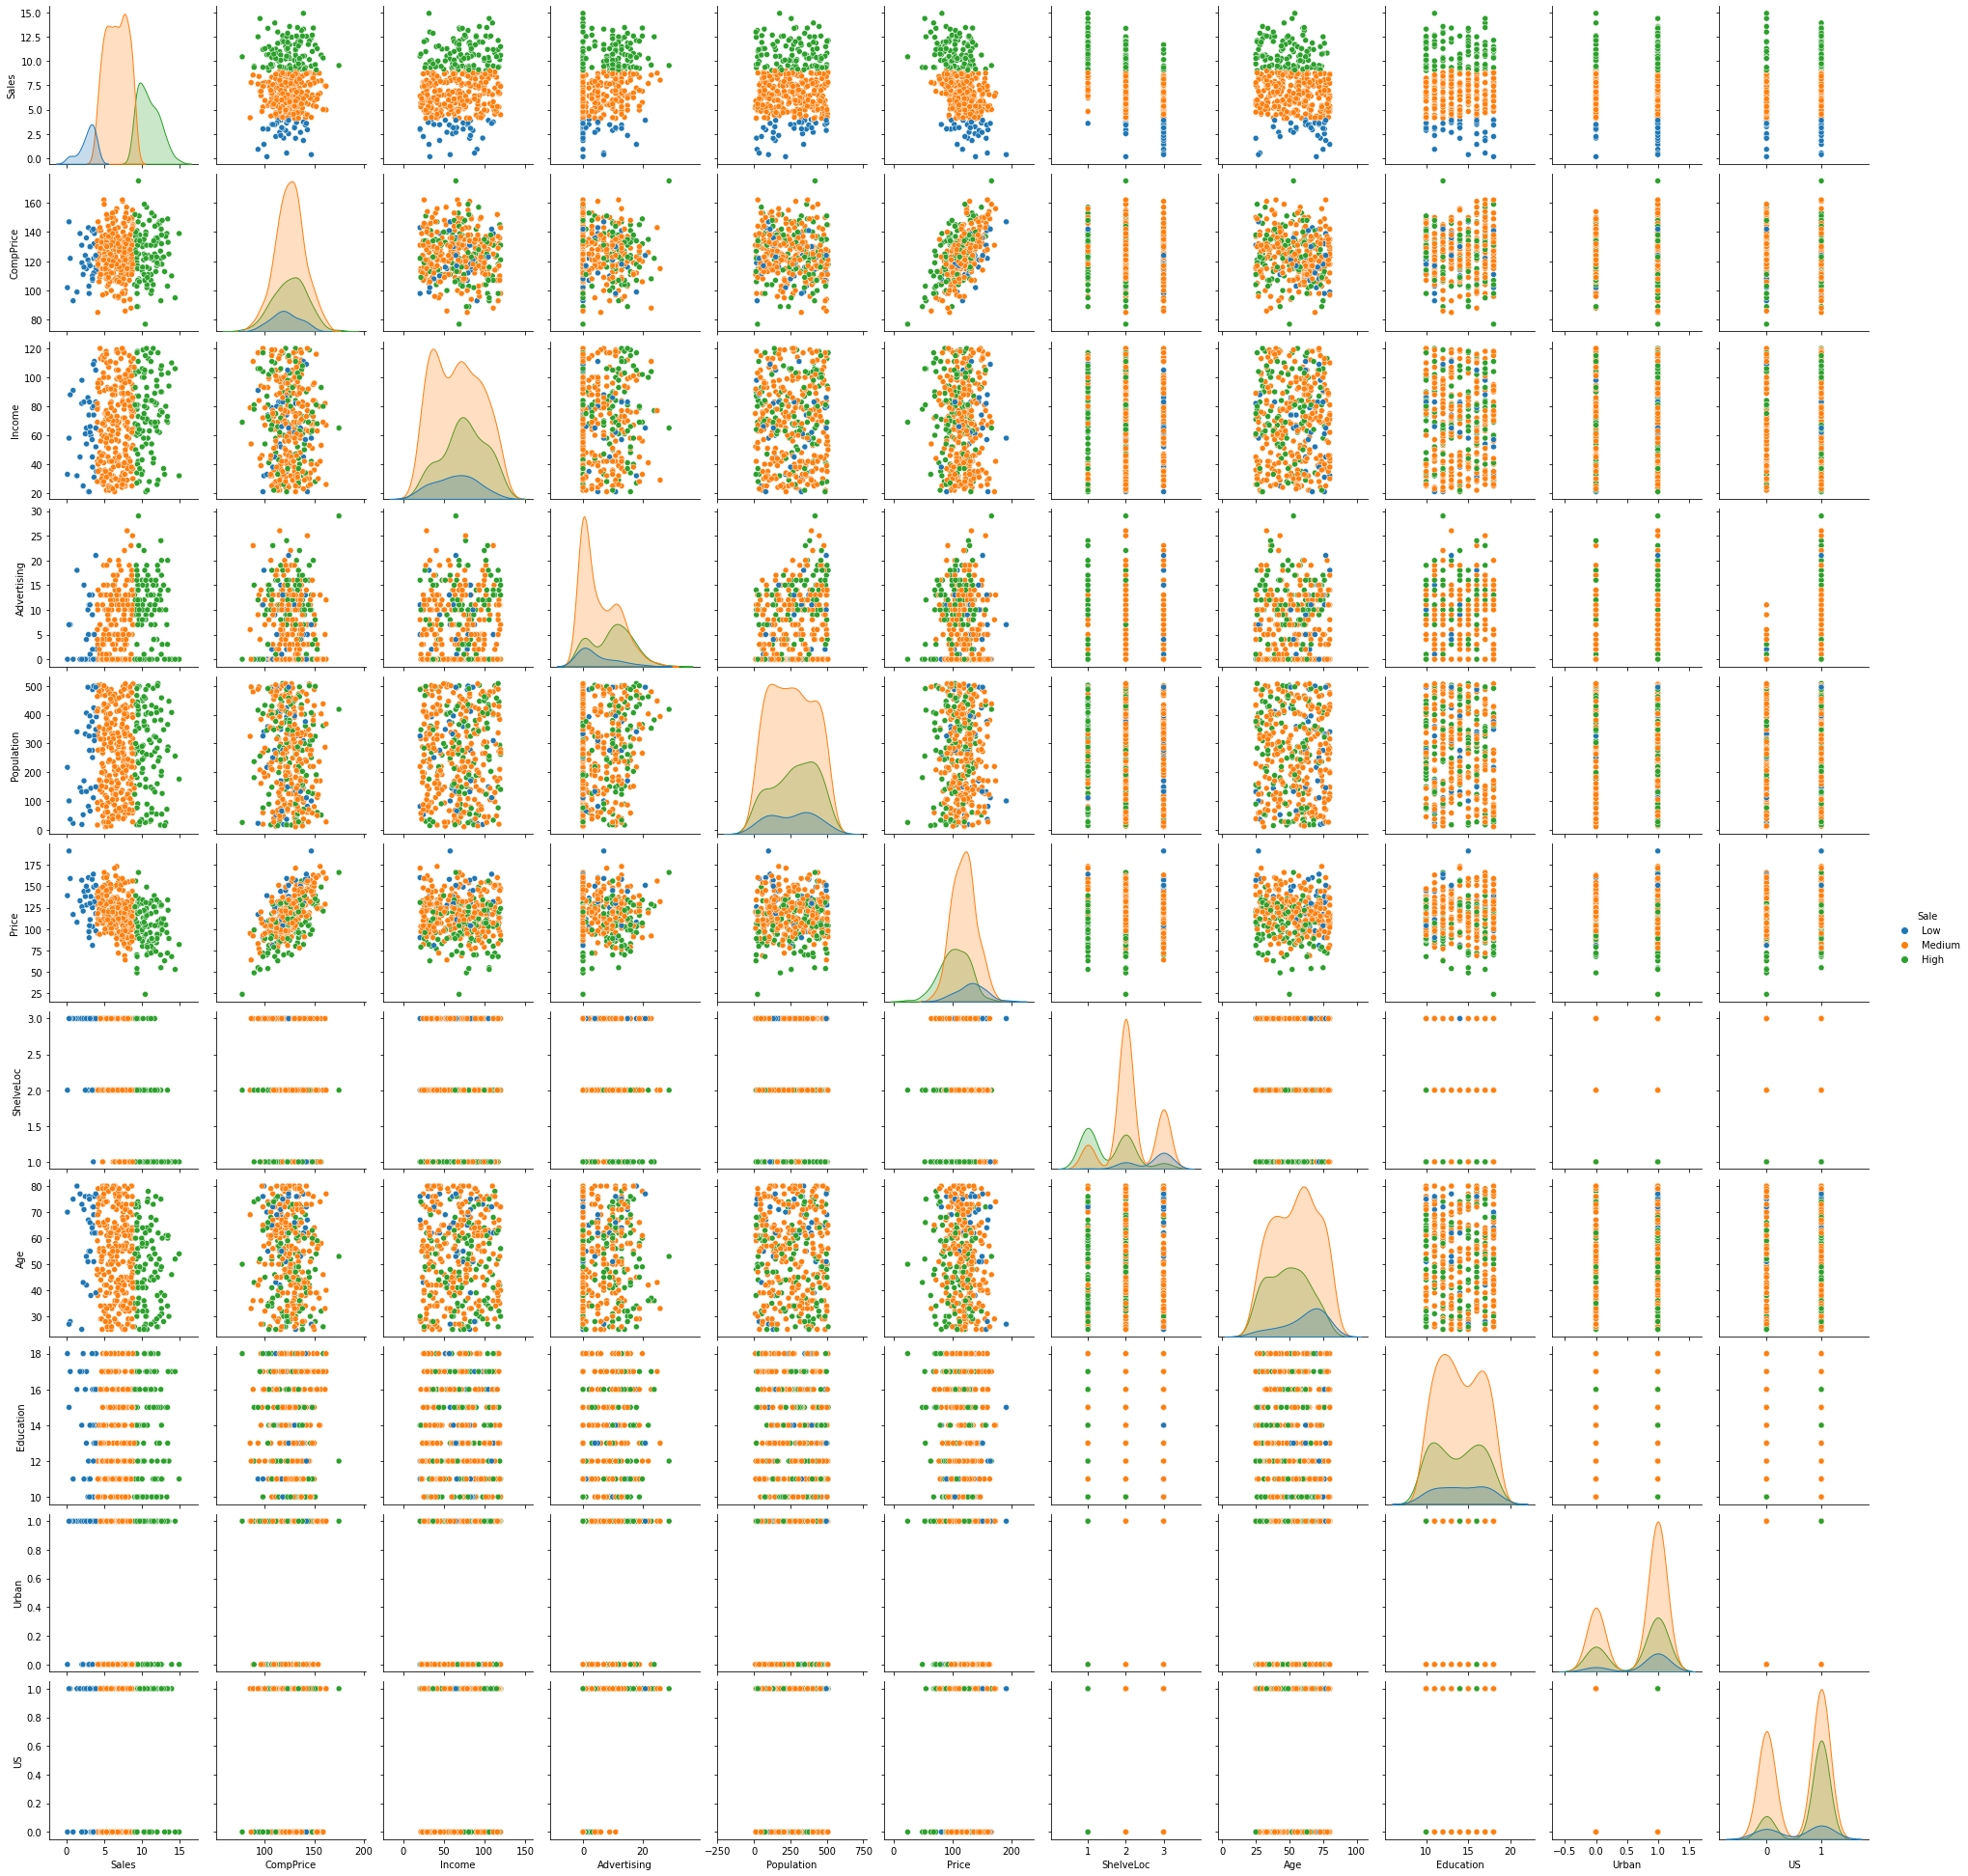

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=company, hue = "Sale")

###Correlation matrix

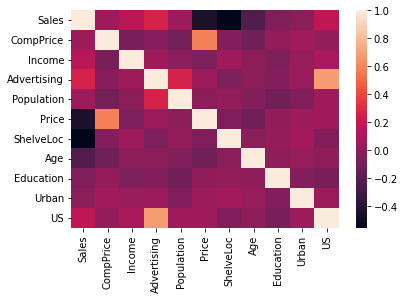

In [ ]:
# correlation matrix
sns.heatmap(company.corr())

In [ ]:
target = pd.DataFrame.astype(company['Sale'], dtype="object")
df1 = company.copy()
df1 = df1.drop('Sale', axis =1)

In [ ]:
# Defining the attributes
X = df1

In [ ]:
target = target.fillna('').apply(str)
target

0        High
1        High
2        High
3      Medium
4      Medium
        ...  
395      High
396    Medium
397    Medium
398    Medium
399      High
Name: Sale, Length: 400, dtype: object

In [ ]:
#label encoding
target = le.fit_transform(target)
target

array([1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 2, 1, 1, 3, 3, 1, 1, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3, 2, 2, 3, 1, 3,
       3, 3, 1, 3, 2, 1, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 2, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3,
       1, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 2, 1, 3, 1, 1, 1, 3, 3,
       3, 3, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 3, 3, 1, 3, 1, 1, 3, 0, 3,
       3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 1, 3, 3, 2, 3, 3, 1, 1,
       1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 2, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 2, 1, 1, 3,

In [ ]:
y=target

In [ ]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state =25)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (320, 11)
Testing split input-  (80, 11)


In [ ]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [ ]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
#print("Classification report - \n", classification_report(y_test,y_pred))

Text(0.5, 1.0, 'Accuracy Score: 1.0')

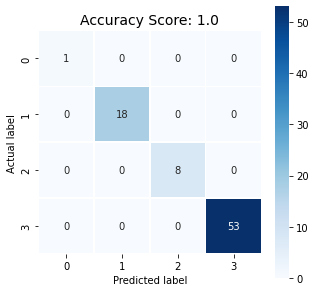

In [ ]:
#2 Way table to understand the correct and wrong  predictions

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 14)

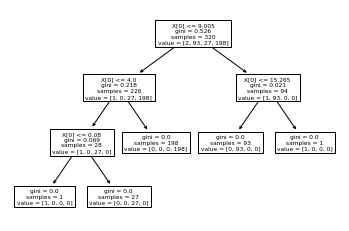

In [ ]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(dtree);

###Building Decision Tree Classifier(C5.0) using Entropy Criteria

In [ ]:
#Building Decision Tree Classifier using Entropy Criteria

model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# Predicting the values of test data
y_pred1 = model.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score: 1.0')

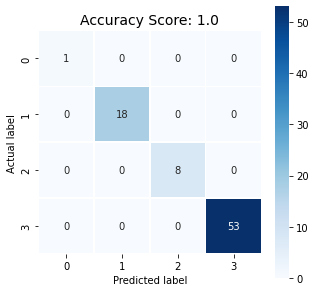

In [ ]:
#2 Way table to understand the correct and wrong  predictions

cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 14)

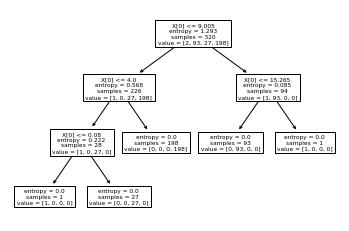

In [ ]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

###Building Decision Tree Classifier(CART) using gini Criteria

In [ ]:
#Building Decision Tree Classifier (CART) using Gini Criteria
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(pred==y_test)

1.0

###Decision Tree Regression

In [ ]:
#Decision Tree Regression Example
from sklearn.tree import  DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model1.score(X_test,y_test)

1.0